In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
pd.set_option('use_inf_as_na',True)

Reading the merged domestic visitors dataset

In [2]:
df=pd.read_csv('/Users/shashankpatil/Desktop/ResumeChallenge5/domestic_visitors1.csv')

Converting the Visitor Column dataType to Integer

In [3]:
df['visitors']=pd.to_numeric(df['visitors'], errors='coerce')
df['visitors']=pd.to_numeric(df['visitors'], errors='coerce')
df['visitors']=df['visitors'].dropna()
df['visitors']=df['visitors'].fillna(0)
df['visitors']=df['visitors'].replace([np.inf,-np.inf],0)
df['visitors'] = df['visitors'].astype(int)
df['visitors'] = df['visitors']/1000000



In [4]:
df['visitors']

0       0.792136
1       0.937820
2       0.582946
3       0.341948
4       0.252887
          ...   
1315    0.389010
1316    0.366862
1317    0.381860
1318    0.365990
1319    0.477635
Name: visitors, Length: 1320, dtype: float64

Top 10 districts having highest domestic visitors from 2016 to 2019

district
Hyderabad                   83.900960
Rajanna Sircilla            48.288276
Yadadri Bhongir             32.077080
Warangal (Urban)            30.726603
Bhadradri Kothagudem        24.131132
Medak                       20.542639
Jayashankar Bhoopalpally    20.361865
Mahbubnagar                 17.180118
Nirmal                      15.475796
Jagtial                     13.103514
Name: visitors, dtype: float64

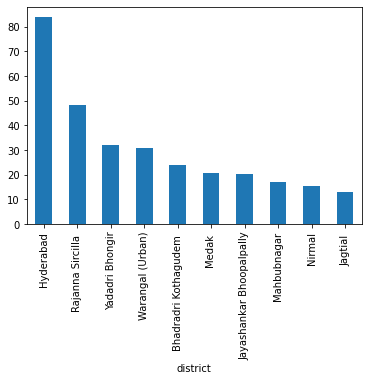

In [5]:
df.groupby('district').visitors.sum().sort_values(ascending=False).head(10).plot(kind="bar")
df.groupby('district').visitors.sum().sort_values(ascending=False).head(10)

Calculating CAGR 

In [14]:
df= df[(df['year'] >= 2016) & (df['year'] <= 2019)]
df_grouped = df.groupby(['district', 'year'])['visitors'].sum().reset_index()
df_pivot = df_grouped.pivot(index='district', columns='year', values='visitors').reset_index()
df_pivot['CAGR'] = (df_pivot[2019]/df_pivot[2016])**(1/3)-1
df_sorted = df_pivot.sort_values('CAGR', ascending=False)
df_sorted

year,district,2016,2017,2018,2019,CAGR
13,Mancherial,0.031202,0.191626,0.398004,0.269810,1.052541
20,Nizamabad,0.006442,0.021949,0.041423,0.046333,0.930293
26,Warangal (Rural),0.077900,0.144250,0.302012,0.353500,0.655582
1,Bhadradri Kothagudem,3.419200,4.094317,3.799878,12.817737,0.553444
4,Jangaon,0.157660,0.165708,0.291022,0.328890,0.277742
24,Siddipet,1.433594,1.145721,1.283300,2.987864,0.277355
22,Rajanna Sircilla,8.701801,11.919347,10.834231,16.832897,0.245996
14,Medak,3.463200,7.726869,3.900000,5.452570,0.163343
23,Sangareddy,3.118000,2.823450,2.269900,4.553160,0.134520
21,Peddapalli,0.012244,0.014898,0.022254,0.016581,0.106358


In [7]:
df1=pd.read_csv('/Users/shashankpatil/Desktop/ResumeChallenge5/foreign_visitors1.csv')
df1['visitors']=pd.to_numeric(df1['visitors'], errors='coerce')
df1['visitors']=df1['visitors'].dropna()
df1['visitors']=df1['visitors'].fillna(0)
df1['visitors']=df1['visitors'].replace([np.inf,-np.inf],0)
df1['visitors']=df1['visitors'].astype(int)
df1['visitors']=df1['visitors']/1000000

In [8]:
df_for= df1[(df1['year'] >= 2016) & (df1['year'] <= 2019)]
df_grouped1 = df_for.groupby(['district', 'year'])['visitors'].sum().reset_index()
df_pivot1= df_grouped1.pivot(index='district', columns='year', values='visitors').reset_index()
df_pivot1['CAGR'] = (df_pivot1[2019]/df_pivot1[2016])**(1/4)-1
df_sorted1= df_pivot1.sort_values('CAGR', ascending=False)
df_sorted1.head(8)


year,district,2016,2017,2018,2019,CAGR
2,Hyderabad,0.163631,0.247179,0.314788,0.319300,0.181907
16,Nagarkurnool,0.000119,0.000311,0.000222,0.000199,0.137173
6,Jogulamba Gadwal,0.000180,0.000305,0.000300,0.000295,0.131455
27,Warangal (Urban),0.001899,0.002630,0.001842,0.002450,0.065762
0,Adilabad,0.000034,0.000038,0.000005,0.000024,-0.083393
12,Mahbubnagar,0.000868,0.000520,0.000454,0.000440,-0.156212
5,Jayashankar Bhoopalpally,0.000338,0.000582,0.000539,0.000045,-0.395949
4,Jangaon,0.000002,0.000000,0.000000,0.000000,-1.000000


Top 3 district based of CAGR of domestic visitors

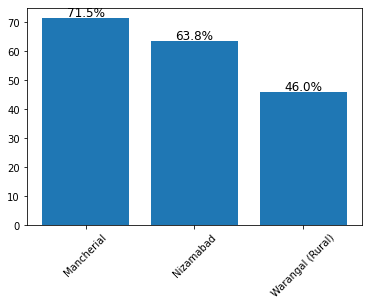

In [9]:
top_3_districts_dom= df_sorted['district'][:3].tolist()
top_3_districts_dom
labels=['Mancherial', 'Nizamabad', 'Warangal (Rural)']#,'Karimnagar ', 'Nalgonda', 'Warangal (Urban)']
values=[71.48, 63.76,45.95]#-69.67, -60.61, -48.63]
plt.bar(labels,values)
plt.xticks(rotation=45)
for i, v in enumerate(values):
    plt.text(i, v + 0.5, "{:.1f}%".format(v), ha='center',fontsize=12)
plt.show()

Top 3 district based of CAGR of foreign visitors

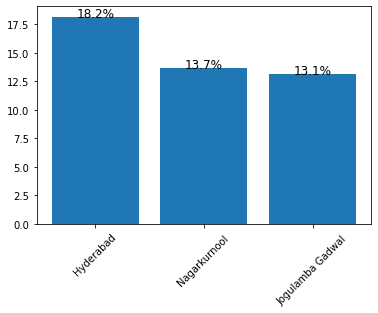

In [10]:
top_3_districts_for=df_sorted1['district'][:3].tolist()
top_3_districts_for
labels=['Hyderabad', 'Nagarkurnool ', 'Jogulamba Gadwal ']#,'Karimnagar ', 'Nalgonda', 'Warangal (Urban)']
values=[18.19,13.71,13.14]#-69.67, -60.61, -48.63]
plt.bar(labels,values)
plt.xticks(rotation=45)
for i, v in enumerate(values):
    plt.text(i, v , "{:.1f}%".format(v), ha='center',fontsize=12)
plt.show()

Bottom 3 district based of CAGR of domestic visitors

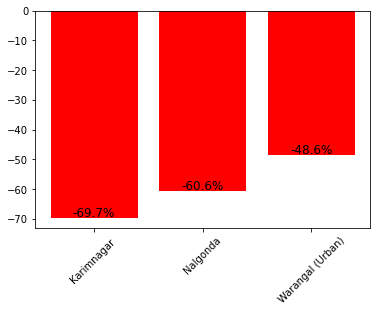

In [11]:
df_sorted = df_pivot.sort_values('CAGR',ascending=True)
Bottom_3_districts_dom = df_sorted['district'][:3].tolist()
Bottom_3_districts_dom
labels=['Karimnagar ', 'Nalgonda', 'Warangal (Urban)']
values=[-69.67, -60.61, -48.63]
plt.bar(labels,values,color=['red'])
plt.xticks(rotation=45)
for i, v in enumerate(values):
    plt.text(i, v + 0.5, "{:.1f}%".format(v), ha='center',fontsize=12)
plt.show()


In [12]:
Bottom 3 district based of CAGR of foreign visitors

SyntaxError: invalid syntax (3720991353.py, line 1)

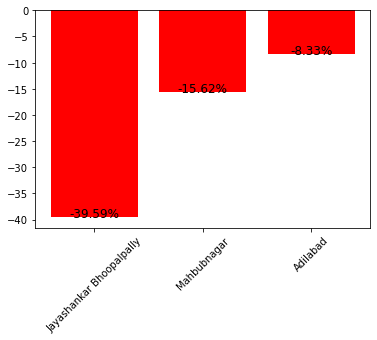

In [13]:
df_sorted = df_pivot1.sort_values('CAGR',ascending=True)
Bottom_3_districts_for= df_sorted['district'][1:4].tolist()
Bottom_3_districts_for
labels=['Jayashankar Bhoopalpally', 'Mahbubnagar','Adilabad'] #,'Karimnagar ', 'Nalgonda', 'Warangal (Urban)']
values=[-39.59,-15.62,-8.33]#-69.67, -60.61, -48.63]
plt.bar(labels,values,color='red')
plt.xticks(rotation=45)
for i, v in enumerate(values):
    plt.text(i, v , "{:.2f}%".format(v), ha='center',fontsize=12)
plt.show()

Month which has highest number of visitors

<AxesSubplot:xlabel='month'>

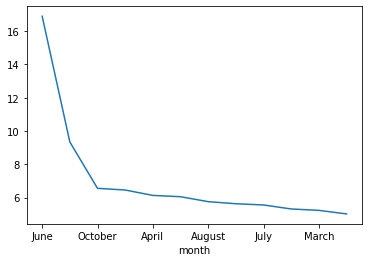

In [14]:
filt=df[df['district']=='Hyderabad'][['month','visitors']]
filt.groupby('month').visitors.sum().sort_values(ascending=False).plot()

In [15]:
Month which has lowest number of visitors 

SyntaxError: invalid syntax (1194396414.py, line 1)

<AxesSubplot:xlabel='month'>

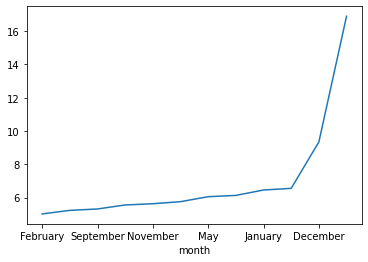

In [16]:
filt=df[df['district']=='Hyderabad'][['month','visitors']]
filt.groupby('month').visitors.sum().sort_values(ascending=True).plot()


In [17]:
df1=pd.read_csv('/Users/shashankpatil/Desktop/ResumeChallenge5/foreign_visitors1.csv')
df1['visitors']=pd.to_numeric(df1['visitors'], errors='coerce')
df1['visitors']=df1['visitors'].dropna()
df1['visitors']=df1['visitors'].fillna(0)
df1['visitors']=df1['visitors'].replace([np.inf,-np.inf],0)
df1['visitors']=df1['visitors'].astype(int)
df1['visitors']=df1['visitors']/1000000


In [18]:
dom=df.groupby('district').visitors.sum()
fori=df1.groupby('district').visitors.sum()
dom=pd.DataFrame(dom)
fori=pd.DataFrame(fori)

ratio of top 3 district with highest domestic to foreign visitor

<AxesSubplot:title={'center':'ratio of top 3 districts with highest domestic visitor to foreign visitor'}, ylabel='visitors'>

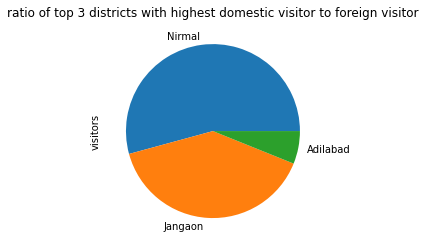

In [19]:
ratio=dom['visitors']/fori['visitors']
ratio=ratio.fillna(0)
ratio.sort_values(ascending=False).head(3)
ratio.sort_values(ascending=False).head(3).plot(kind="pie",title="ratio of top 3 districts with highest domestic visitor to foreign visitor")

ratio of bottom 3 district with lowest domestic to foreign visito

<AxesSubplot:title={'center':'ratio of bottom 3 districts with  lowest domestic visitor to foreign visitor'}, ylabel='visitors'>

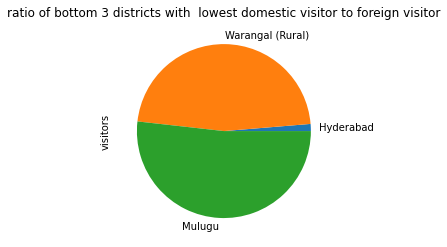

In [20]:
ratio=ratio[~(ratio.sort_values()==0)]
ratio.sort_values().head(3).plot(kind="pie",title="ratio of bottom 3 districts with  lowest domestic visitor to foreign visitor")


In [21]:
#ratio.sort_values().head(3).plot(kind="pie",title="ratio of lowest domestic visitor to foreign visitor")


In [23]:
df_new=pd.read_csv('/Users/shashankpatil/Desktop/ResumeChallenge5/visitor_population2.csv')

top 5 distrct having highest population to tourist footfall ratio

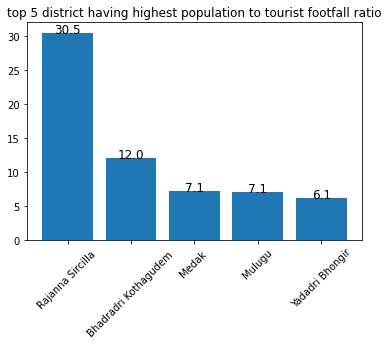

district
Rajanna Sircilla         30.492335
Bhadradri Kothagudem     11.987473
Medak                     7.104992
Mulugu                    7.062725
Yadadri Bhongir           6.071250
Name: tourist_footfal_ratio, dtype: float64

In [25]:
df_new.rename(columns={'visitor':'visitors'},inplace=True)
df_new['tourist_footfal_ratio']=df_new['visitors']/df_new['Population']
top_5_districts_tourist_footfall_ratio=df_new.groupby('district').tourist_footfal_ratio.sum().sort_values(ascending=False).head(5)
top_5_districts_tourist_footfall_ratio
labels=list(top_5_districts_tourist_footfall_ratio.index)
values=list(top_5_districts_tourist_footfall_ratio[0:])
plt.bar(labels,values)
plt.xticks(rotation=45)
plt.title("top 5 district having highest population to tourist footfall ratio")
for i, v in enumerate(values):
    plt.text(i, v , "{:.1f}".format(v), ha='center',fontsize=12)
plt.show()
top_5_districts_tourist_footfall_ratio

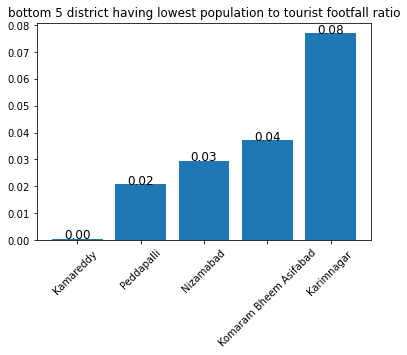

['Kamareddy ',
 'Peddapalli',
 'Nizamabad',
 'Komaram Bheem Asifabad',
 'Karimnagar ']

In [26]:
bottom_5_districts_tourist_footfall_ratio=df_new.groupby('district').tourist_footfal_ratio.sum().sort_values().head(5)
bottom_5_districts_tourist_footfall_ratio
labels=list(bottom_5_districts_tourist_footfall_ratio.index)
values=list(bottom_5_districts_tourist_footfall_ratio[0:])
plt.bar(labels,values)
plt.xticks(rotation=45)
plt.title("bottom 5 district having lowest population to tourist footfall ratio")
for i, v in enumerate(values):
    plt.text(i, v , "{:.2f}".format(v), ha='center',fontsize=12)
plt.show()
top_5_districts_tourist_footfall_ratio
labels

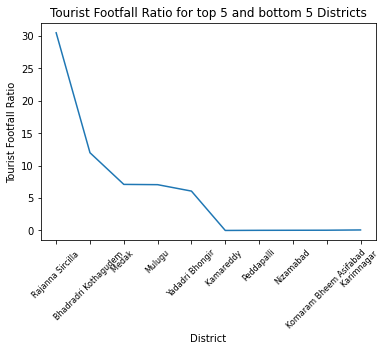

In [27]:
v=list(top_5_districts_tourist_footfall_ratio[0:5])
v1=list(bottom_5_districts_tourist_footfall_ratio[0:5])
v2=v+v1
v2
d=list(top_5_districts_tourist_footfall_ratio.index)
d1=list(bottom_5_districts_tourist_footfall_ratio.index)
d2=d+d1
plt.plot(d2,v2)
plt.title('Tourist Footfall Ratio for top 5 and bottom 5 Districts')
plt.xlabel('District')
plt.ylabel('Tourist Footfall Ratio')
plt.xticks(rotation=45,fontsize=8)
plt.show()

In [28]:
filt=df[df['district']=='Hyderabad'][['date','month','year','visitors']]
filt1=df1[df1['district']=='Hyderabad'][['date','month','year','visitors']]

d

['Rajanna Sircilla ',
 'Bhadradri Kothagudem ',
 'Medak ',
 'Mulugu',
 'Yadadri Bhongir']

Projected number of foreign domestic visitor to Hyderabad district in 2025 

In [29]:
filt['date'] = pd.to_datetime(filt['date'])
filt.set_index('date', inplace=True)
filt1['date'] = pd.to_datetime(filt1['date'])
filt1.set_index('date', inplace=True)


In [30]:
filt=filt[filt['year']==2019]
vis_2019_dom=filt['visitors'].sum()
proj_dom=vis_2019_dom*(1+(-0.1235))**6
print(f"the projected number of domestic vistors {round(proj_dom,2)} M")


the projected number of domestic vistors 6.26 M


the projected number of foreign visitors to Hyderabad in 2025

In [31]:
filt1=filt1[filt1['year']==2019]
vis_2019_for=filt1['visitors'].sum()
proj_for=vis_2019_for*(1+(0.1819))**6
print(f"the projected number of foreign vistors {round(proj_for,2)} M")

the projected number of foreign vistors 0.87 M


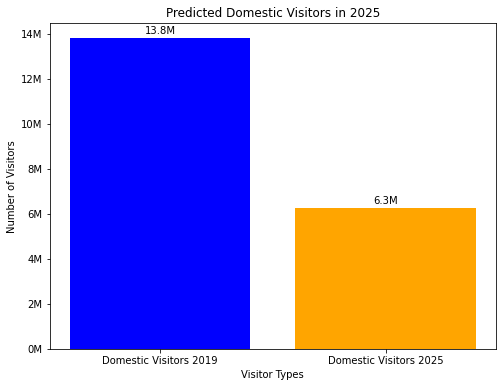

In [32]:
import matplotlib.ticker as ticker
labels = ['Domestic Visitors 2019','Domestic Visitors 2025']
values1 = proj_dom
values2=vis_2019_dom
val=[values2,values1]
colors=['blue','orange']
plt.figure(figsize=(8, 6))
plt.bar(labels, val,color=colors)
plt.title('Predicted Domestic Visitors in 2025')
plt.xlabel('Visitor Types')
plt.ylabel('Number of Visitors')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0fM'))
for i, v in enumerate(val):
    plt.text(i, v+0.2, "{:.1f}M".format(v), ha='center')


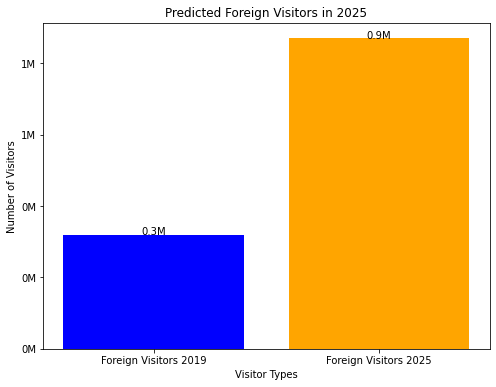

In [33]:
labels = ['Foreign Visitors 2019','Foreign Visitors 2025']
values1 = proj_for
values2=vis_2019_for
val=[values2,values1]
colors=['blue','orange']
plt.figure(figsize=(8, 6))
plt.bar(labels, val,color=colors)
plt.title('Predicted Foreign Visitors in 2025')
plt.xlabel('Visitor Types')
plt.ylabel('Number of Visitors')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0fM'))
for i, v in enumerate(val):
    plt.text(i, v, "{:.1f}M".format(v), ha='center')

In [34]:
filt1.groupby('year').visitors.sum()

year
2019    0.3193
Name: visitors, dtype: float64

Projected Revenue for domestic and foreign visitor for Hyderabad district in 2025 

In [53]:
domestic_tourist_spend=1200
foreign_tourist_spend=5600
revenue_generated_domestic_visitor=proj_dom*domestic_tourist_spend
revenue_generated_foreign_visitor=proj_for*foreign_tourist_spend

In [54]:
print(f"the projected revenue generated from domestic visitor in Hyderabad in 2025 is Rs {round(revenue_generated_domestic_visitor,2)} M ")

the projected revenue generated from domestic visitor in Hyderabad in 2025 is Rs 7510.11 M 


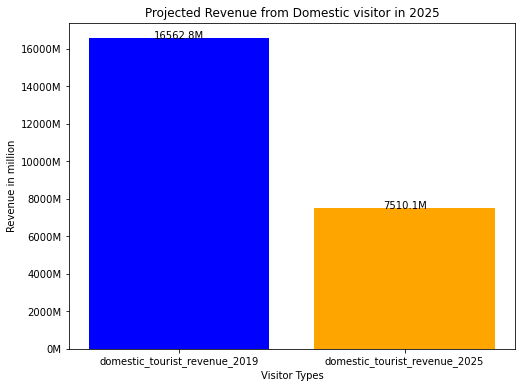

In [55]:
import matplotlib.ticker as ticker
labels = ['domestic_tourist_revenue_2019','domestic_tourist_revenue_2025']
values1 = vis_2019_dom*domestic_tourist_spend
values2=proj_dom*domestic_tourist_spend
val=[values1,values2]
colors=['blue','orange']
plt.figure(figsize=(8, 6))
plt.bar(labels, val,color=colors)
plt.title('Projected Revenue from Domestic visitor in 2025')
plt.xlabel('Visitor Types')
plt.ylabel('Revenue in million')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0fM'))
for i, v in enumerate(val):
    plt.text(i, v+0.3, "{:.1f}M".format(v), ha='center')

In [56]:
print(f"the projected revenue generated from foreign visitor in Hyderabad in 2025 is Rs.{round(revenue_generated_foreign_visitor,2)} M ")

the projected revenue generated from foreign visitor in Hyderabad in 2025 is Rs.4873.84 M 


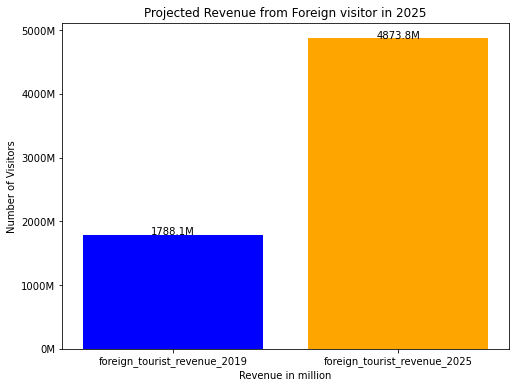

In [57]:
labels = ['foreign_tourist_revenue_2019','foreign_tourist_revenue_2025']
values1 = vis_2019_for*foreign_tourist_spend
values2=proj_for*foreign_tourist_spend
val=[values1,values2]
colors=['blue','orange']
plt.figure(figsize=(8, 6))
plt.bar(labels, val,color=colors)
plt.title('Projected Revenue from Foreign visitor in 2025')
plt.xlabel('Revenue in million')
plt.ylabel('Number of Visitors')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0fM'))
for i, v in enumerate(val):
     plt.text(i, v+0.2, "{:.1f}M".format(v), ha='center')

In [58]:
df6=pd.read_csv('/Users/shashankpatil/Desktop/ResumeChallenge5/merged.csv')

In [59]:
df6

,district,date,month,year,visitors
0,Adilabad,1/1/2016,January,2016,792136
1,Adilabad,1/2/2016,February,2016,937820
2,Adilabad,1/3/2016,March,2016,582946
3,Adilabad,1/4/2016,April,2016,341948
4,Adilabad,1/5/2016,May,2016,252887
...,...,...,...,...,...
2635,Yadadri Bhongir,1/8/2019,August,2019,0
2636,Yadadri Bhongir,1/9/2019,September,2019,0
2637,Yadadri Bhongir,1/10/2019,October,2019,0
2638,Yadadri Bhongir,1/11/2019,November,2019,0
